# PART-A

• DOMAIN: Telecom  

• CONTEXT:  A  telecom  company  wants  to  use  their  historical  customer  data  to  predict  behaviour  to  retain  customers.  You  can  analyse  all relevant customer data and develop focused customer retention programs. 

• DATA  DESCRIPTION:  Each  row  represents  a  customer,  each  column  contains  customer’s  attributes  described  on  the  column  Metadata.  The data set includes information about:

•Customers who left within the last month – the column is called Churn 

•Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 

•Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

•Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.


1. Data Understanding & Exploration:

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [1]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

dfChurn1=pd.read_csv('TelcomCustomer-Churn_1.csv')
dfChurn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
dfChurn2=pd.read_csv('TelcomCustomer-Churn_2.csv')
dfChurn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame.

In [4]:
dfMerged=pd.merge(dfChurn1, dfChurn2, on='customerID')

In [5]:
dfMerged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dfMerged.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
dfMerged.shape

(7043, 21)

In [8]:
dfMerged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [9]:
dfChurn1Cols=set(dfChurn1.columns)
dfChurn2Cols=set(dfChurn2.columns)
type(dfChurn1Cols)
if dfChurn1Cols.union(dfChurn2Cols) == set(dfMerged.columns):
    print('All the columns have been merged properly')
else:
    print('Some Columns seem to be missed')


All the columns have been merged properly


2. Data Cleaning & Analysis:

A. Impute missing/unexpected values in the DataFrame.

In [10]:
dfMerged.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
dfMerged.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
l=['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']
for i in dfMerged.columns:
    if i in l:
        continue
    print(dfMerged[i].value_counts())
    print(dfMerged[i].unique())
    print('\n')


gender
Male      3555
Female    3488
Name: count, dtype: int64
['Female' 'Male']


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
[0 1]


Partner
No     3641
Yes    3402
Name: count, dtype: int64
['Yes' 'No']


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
['No' 'Yes']


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
['No' 'Yes']


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
['No phone service' 'No' 'Yes']


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
['DSL' 'Fiber optic' 'No']


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
['No' 'Yes' 'No internet service']


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
['Yes' 'No' 'No internet service']


DeviceProtection
No 

In [13]:
replaceDict={'No internet service': 'NoInternetService', 'No phone service': 'NoPhoneService',
             'Bank transfer (automatic)': 'BankTransfer', 'Credit card (automatic)':'CreditCard',
             'Electronic check': 'ElectronicCheck', 'Mailed check': 'MailedCheck', 
             'Month-to-month': 'Monthly', 'Fiber optic': 'FiberOptic', 'One year':'OneYear', 'Two year': 'TwoYear'}
dfMerged.replace(to_replace=replaceDict, inplace=True)

In [14]:
l=['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']
for i in dfMerged.columns:
    if i in l:
        continue
    print(dfMerged[i].value_counts())
    print(dfMerged[i].unique())
    print('\n')

gender
Male      3555
Female    3488
Name: count, dtype: int64
['Female' 'Male']


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
[0 1]


Partner
No     3641
Yes    3402
Name: count, dtype: int64
['Yes' 'No']


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
['No' 'Yes']


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
['No' 'Yes']


MultipleLines
No                3390
Yes               2971
NoPhoneService     682
Name: count, dtype: int64
['NoPhoneService' 'No' 'Yes']


InternetService
FiberOptic    3096
DSL           2421
No            1526
Name: count, dtype: int64
['DSL' 'FiberOptic' 'No']


OnlineSecurity
No                   3498
Yes                  2019
NoInternetService    1526
Name: count, dtype: int64
['No' 'Yes' 'NoInternetService']


OnlineBackup
No                   3088
Yes                  2429
NoInternetService    1526
Name: count, dtype: int64
['Yes' 'No' 'NoInternetService']


DeviceProtection
No                   3095
Yes  

In [15]:
non_numeric_values = dfMerged[~dfMerged['TotalCharges'].str.match(r'^-?\d+\.?\d*$')]
non_numeric_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,NoPhoneService,DSL,Yes,...,Yes,Yes,Yes,No,TwoYear,Yes,BankTransfer,52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,TwoYear,No,MailedCheck,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,TwoYear,No,MailedCheck,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,TwoYear,No,MailedCheck,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,NoPhoneService,DSL,Yes,...,Yes,Yes,Yes,No,TwoYear,No,CreditCard,56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,TwoYear,No,MailedCheck,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,TwoYear,No,MailedCheck,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,TwoYear,No,MailedCheck,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,NoInternetService,...,NoInternetService,NoInternetService,NoInternetService,NoInternetService,OneYear,Yes,MailedCheck,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,TwoYear,No,MailedCheck,73.35,,No


We have some empty spaces in the TotalCHarges column making the datatype of the column as object.

In [16]:
dfMerged.replace(to_replace=' ', value=0, inplace=True)

In [17]:
dfMerged.rename(columns = {'tenure':'Tenure'}, inplace = True) 


We have removed ' ' spaces in 'TotalCharges' column and replaced them with 0.

And we have renamed the 'tenure' to 'Tenure'

This is the dictionary that is used inorder to replace the patterns in the data set for better readability.

            {'No internet service': 'NoInternetService', 'No phone service': 'NoPhoneService',
             'Bank transfer (automatic)': 'BankTransfer', 'Credit card (automatic)':'CreditCard',
             'Electronic check': 'ElectronicCheck', 'Mailed check': 'MailedCheck', 
             'Month-to-month': 'Monthly', 'Fiber optic': 'FiberOptic', 'One year':'OneYear', 'Two year': 'TwoYear'} 

B. Make sure all the variables with continuous values are of ‘Float’ type.

In [18]:
dfMerged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
dfMerged['TotalCharges']=dfMerged['TotalCharges'].astype(float)

In [20]:
dfMerged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

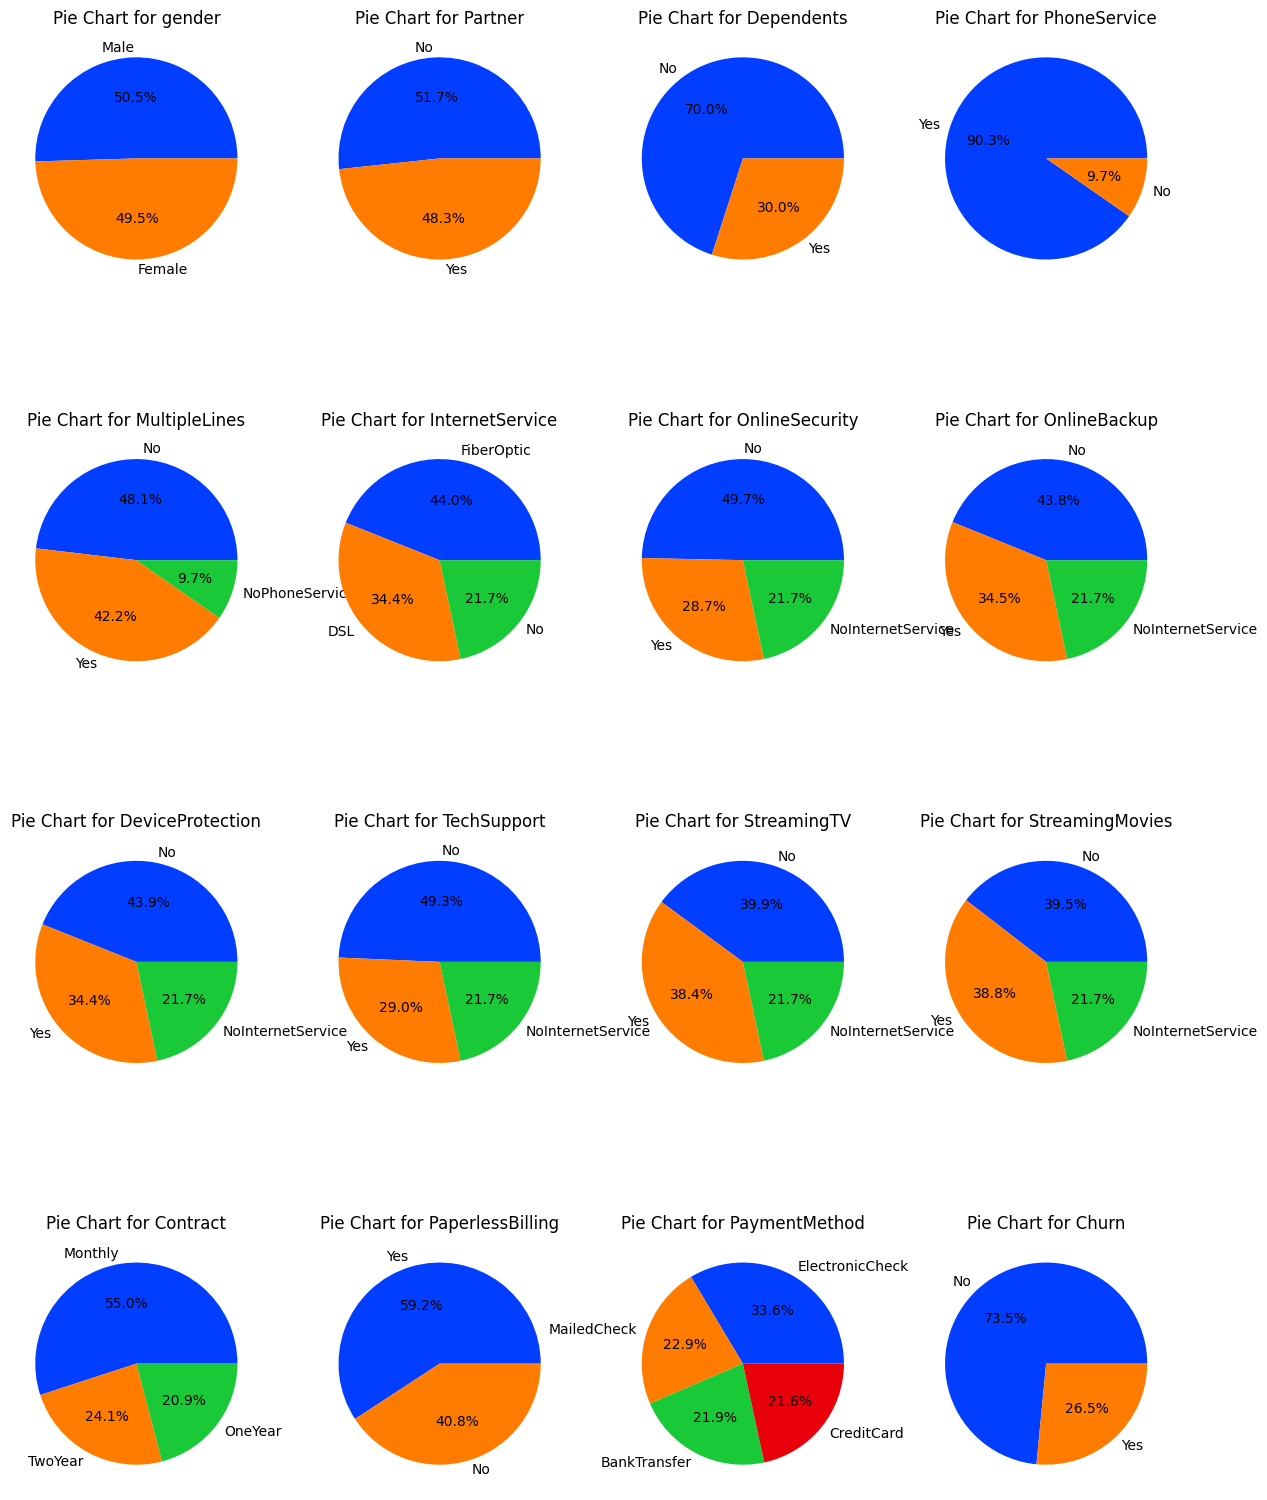

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def createPieChart(df: pd.DataFrame):
    catCol=[]
    for col in df.columns:
        if df[col].dtype=='object':
            catCol.append(col)
    catCol.remove('customerID')

    num_plots = len(catCol)
    num_cols = 4 
    num_rows = -(-num_plots // num_cols) 
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(catCol):
        counts = df[col].value_counts()
        axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('bright'))
        axs[i].set_title(f'Pie Chart for {col}')


createPieChart(dfMerged)

D. Share insights for Q2.c.

- By seeing the pie chart for gender, it clearly shows that the data is almost equally collected between male and female as the percentage is near to 50% for both male and female

- Similarly the dataset is split at around 50% for customers having partners as well

- A significant percentage of customers use phone service, which sums to around 90.3%

- The pie chart for the categorical columns InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies are looking similar. This gives a decent information that the data in these columns are closely related. And we can confirm that as we can see that the 'NoInternetService' label is present in all the mentioned pie charts.

E. Encode all the appropriate Categorical features with the best suitable approach. 

In [22]:
# dfMerged.to_csv('merged.csv')

In [23]:
dfMerged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
labelEncode=LabelEncoder()
categoryCols=[x for x in dfMerged.columns if dfMerged[x].dtype=='object' and x != 'Churn' and x != 'customerID']
print(categoryCols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [25]:
dfMerged.shape

(7043, 21)

In [26]:
    for col in categoryCols:
        dfMerged[col] = labelEncode.fit_transform(dfMerged[col])
    dfMerged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


In [27]:
dfMerged.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
Tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

The above dtypes output shows that we have encoded all the categorical variables except the 'Churn' variable as it is the dependent variable.

F. Split the data into 80% train and 20% test. 

In [28]:
from sklearn.model_selection import train_test_split
X=dfMerged.drop('Churn', axis=1)
y=dfMerged['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((5634, 20), (1409, 20))

G. Normalize/Standardize the data with the best suitable approach.

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dfMerged[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scale.fit_transform(dfMerged[['Tenure', 'MonthlyCharges', 'TotalCharges']])

We have used the standard scaler technique to normalize the 3 numerical columns we have as there are some outliers in the data

3. Model building and performance improvement: 

A. Train a model using Decision tree and check the performance of the model on train and test data.

In [31]:
dfMerged.drop(columns=['customerID'], inplace=True)

We have dropped the 'customerID' column as it does not have any significant impact on the model building

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=dfMerged.drop('Churn', axis=1)
y=dfMerged['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We have split the data again here, just so the new train and test data have the standardized data.

In [33]:
classifierTree = DecisionTreeClassifier(random_state=42)
classifierTree.fit(X_train, y_train)
y_trainpredict = classifierTree.predict(X_train)
Ntrain_accuracy = accuracy_score(y_train, y_trainpredict)
print(f'The accuracy of the model  on train data set is: {Ntrain_accuracy}')
y_testpredict = classifierTree.predict(X_test)
Ntest_accuracy = accuracy_score(y_test, y_testpredict)
print(f'The accuracy of the model  on test data set is: {Ntest_accuracy}')


The accuracy of the model  on train data set is: 0.9985800496982605
The accuracy of the model  on test data set is: 0.7246273953158269


We can see that the model have learnt well from the train data set as it gives 99% accuracy but in case of test dataset, it is not giving best accuracy as it gives 73% accuracy.

B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b 

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
classifierTree = DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(classifierTree, param_grid, cv=5, scoring='accuracy')
gridSearch.fit(X_train, y_train)
GSbestParams = gridSearch.best_params_
GSbestScore = gridSearch.best_score_
GSbestModel = gridSearch.best_estimator_
y_train_pred = GSbestModel.predict(X_train)
y_test_pred = GSbestModel.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)
print(f'Best parameters for grid search is {GSbestParams}')

Accuracy on training data: 0.7981895633652822
Accuracy on test data: 0.794180269694819
Best parameters for grid search is {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [35]:
improvedAccTrain = train_accuracy - Ntrain_accuracy
improvedAccTest = test_accuracy - Ntest_accuracy
print(f'Th accuracy in training data after using grid search is: {improvedAccTrain}')
print(f'Th accuracy in test data after using grid search is: {improvedAccTest}')

Th accuracy in training data after using grid search is: -0.2003904863329783
Th accuracy in test data after using grid search is: 0.06955287437899216


The accuracy of the model in training data has reduced by 20% which shows that it had prevented overfitting. At the same time the performance on test data has been imporoved by 6.9% with the best hyperparameters which is {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2} .

C. Train a model using Random forest  and check the performance of the model on train and test data.

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfTree = RandomForestClassifier(random_state=42)
rfTree.fit(X_train, y_train)
ytrain_predicted=rfTree.predict(X_train)
y_predicted=rfTree.predict(X_test)
trainScore=accuracy_score(y_train, ytrain_predicted)
print(f'The performance of randomforest model on the train data is {trainScore}')
testScore=accuracy_score(y_test, y_predicted)
print(f'The performance of randomforest model on the test data is {testScore}')

The performance of randomforest model on the train data is 0.9984025559105432
The performance of randomforest model on the test data is 0.794889992902768


The model is performing close to the performance of the decision tree itself without any hyperparameter tuning.

D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d 

In [37]:
param_grid={
    'n_estimators' : [100, 200],
    'max_depth' : [5, 10, 15, 20, 25], 
    'min_samples_split' : [2, 4, 6],
}
rfTreeGS = RandomForestClassifier(random_state=42)
rfGridSearch = GridSearchCV(rfTreeGS, param_grid, cv=5, scoring= 'accuracy')
rfGridSearch.fit(X_train, y_train)
best_score = rfGridSearch.best_score_
best_params = rfGridSearch.best_params_
best_rf_model = rfGridSearch.best_estimator_
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", testScore)
print(f'The best parameters for random forest using gridsearch is: {best_params}')

Accuracy on training data: 0.887291444799432
Accuracy on test data: 0.794889992902768
The best parameters for random forest using gridsearch is: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
improvedAccTrain = train_accuracy - trainScore
improvedAccTest = test_accuracy - Ntest_accuracy
print(f'Th accuracy in training data after using grid search is: {improvedAccTrain}')
print(f'Th accuracy in test data after using grid search is: {improvedAccTest}')

Th accuracy in training data after using grid search is: -0.11111111111111116
Th accuracy in test data after using grid search is: 0.07948899929027675


The accuracy of the model in training data has reduced by 11.11% which shows that it had prevented overfitting. At the same time the performance on test data has been imporoved by 7.9% with the best hyperparameters which is {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}.

E. Train a model using Adaboost and check the performance of the model on train and test data

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost= AdaBoostClassifier(random_state=42)
adaBoost.fit(X_train, y_train)
abYtrainPredict = adaBoost.predict(X_train)
abTrainScore = accuracy_score(y_train, abYtrainPredict)
print(f'The accuracy of adaboost model on trainnig data is: {abTrainScore}')

abYtestPredict = adaBoost.predict(X_test)
abTestScore = accuracy_score(y_test, abYtestPredict)
print(f'The accuracy of adaboost model on trainnig data is: {abTestScore}')


The accuracy of adaboost model on trainnig data is: 0.8084842030528931
The accuracy of adaboost model on trainnig data is: 0.8026969481902059


F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.e and Q3.f

In [40]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
adaBoostClassy = AdaBoostClassifier(random_state=42)
adaBoostGs = GridSearchCV(adaBoostClassy, param_grid, cv=5, scoring='accuracy')
adaBoostGs.fit(X_train, y_train)
adaBestParams = adaBoostGs.best_params_
adaBestModel = adaBoostGs.best_estimator_
adaYTrainPredict =  adaBestModel.predict(X_train)
adaYTestPredict = adaBestModel.predict(X_test)

adaTrainScore = accuracy_score(y_train, adaYTrainPredict)
adaTestScore = accuracy_score(y_test, adaYTestPredict)

print("Accuracy on training data:", adaTrainScore)
print("Accuracy on test data:", adaTestScore)
print(f'The best parameters for adaBoost from gridsearch is: {adaBestParams}')


Accuracy on training data: 0.8084842030528931
Accuracy on test data: 0.8097941802696949
The best parameters for adaBoost from gridsearch is: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}


In [41]:
improvedAccTrain = adaTrainScore - abTrainScore
improvedAccTest = adaTestScore - abTestScore
print(f'Th accuracy in training data after using grid search is: {improvedAccTrain}')
print(f'Th accuracy in test data after using grid search is: {improvedAccTest}')

Th accuracy in training data after using grid search is: 0.0
Th accuracy in test data after using grid search is: 0.00709723207948898


There is no significant improvement after fine tuning the hyper parameters but the model sems to perform consistently as the both train and test data accuracy score is close to 80%

G. Train a model using GradientBoost and check the performance of the model on train and test data.

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoostClassy = GradientBoostingClassifier(random_state=42)
gradBoostClassy.fit(X_train, y_train)
gbYTrainPredict = gradBoostClassy.predict(X_train)
gbTrainAccScore = accuracy_score(y_train, gbYTrainPredict)
print(f'Accuracy score on training data is: {gbTrainAccScore}')
gbYTestPredict = gradBoostClassy.predict(X_test)
gbTestAccScore = accuracy_score(y_test, gbYTestPredict)
print(f'ACcuracy score on test data is: {gbTestAccScore}')


Accuracy score on training data is: 0.8272985445509408
ACcuracy score on test data is: 0.8090844570617459


H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [43]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
}
gbGsClassy = GradientBoostingClassifier(random_state=42)
gbGs = GridSearchCV(gbGsClassy, param_grid, cv=5, scoring='accuracy')
gbGs.fit(X_train, y_train)
gbBestParams = gbGs.best_params_
gbBestModel = gbGs.best_estimator_
gbYTrainPredict =  gbBestModel.predict(X_train)
gbYTestPredict = gbBestModel.predict(X_test)

gbTrainScore = accuracy_score(y_train, gbYTrainPredict)
gbTestScore = accuracy_score(y_test, gbYTestPredict)

print("Accuracy on training data:", gbTrainScore)
print("Accuracy on test data:", gbTestScore)
print(f'The best parameters for GradientBoost from gridsearch is: {gbBestParams}')

Accuracy on training data: 0.8170039048633297
Accuracy on test data: 0.8090844570617459
The best parameters for GradientBoost from gridsearch is: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [44]:
improvedAccTrain = gbTrainScore - gbTrainAccScore
improvedAccTest = gbTestScore - gbTestAccScore
print(f'Th accuracy in training data after using grid search is: {improvedAccTrain}')
print(f'Th accuracy in test data after using grid search is: {improvedAccTest}')

Th accuracy in training data after using grid search is: -0.010294639687611018
Th accuracy in test data after using grid search is: 0.0


There is no significant difference in the model tuning. The best hyperparameters that are best is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}. 

Note:

Due to my machine constraints i didnt use Most aggressive learning rate here.



I. Provide detailed analysis of the below steps  :

(1) Compare the performance of each model in train stage  and test stage

#### Decision Tree:

Accuracy on training data: 0.7981895633652822

Accuracy on test data: 0.794180269694819

#### Random Forest:

Accuracy on training data: 0.887291444799432

Accuracy on test data: 0.794889992902768

#### AdaBoost:

Accuracy on training data: 0.8084842030528931

Accuracy on test data: 0.8097941802696949

#### GradientBoost:

Accuracy on training data: 0.8170039048633297

Accuracy on test data: 0.8090844570617459

(2) Provide your observation on which model performed the best

In my perspective i conclude that AdaBoost performed best which has accuracy of 0.80% in both training and test data.

(3) Provide your reasoning on why the model performed best 

The reason for considering that AdaBoost performed best is because the accuracy is very much similar that it varies only in range of 0.001% on comparison of training and test data. This shows that the model is able to predict well.

(4) Provide your final conclusion on your observation

Looking at how well the models predict if customers will leave or not, AdaBoost and GradientBoost stand out as the best. They're good at spotting patterns in the data and making predictions, which is what we want. AdaBoost has a tiny edge in being a bit more accurate on new data, so it might be the better pick.